# Convolucional Autoencoder

### Victor Nascimento Ribeiro - 03/2023

In [29]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPool2D, UpSampling2D
from keras.models import Sequential



## Download Stanford Dogs Dataset

In [ ]:
from google.colab import files

# upload do kaggle.json
files.upload()

In [3]:
 ! pip install -q kaggle

In [4]:
! mkdir /content/.kaggle/
! mkdir /root/.kaggle/
! cp /content/kaggle.json /content/.kaggle/
! cp /content/kaggle.json /root/.kaggle/

In [5]:
! chmod 600 /root/.kaggle/kaggle.json
! chmod 600 /content/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d jessicali9530/stanford-dogs-dataset

100% 748M/750M [00:22<00:00, 33.8MB/s]
100% 750M/750M [00:22<00:00, 35.3MB/s]


In [ ]:
! unzip '/content/stanford-dogs-dataset.zip' -d '/content/stanford-dogs-dataset'

\\

## Load Data

In [8]:
train_path = '/content/stanford-dogs-dataset/images/Images'

In [9]:
train_batches = ImageDataGenerator(rescale=1./255)

train_batches = train_batches.flow_from_directory(directory=train_path,
                                  target_size=(64,64),
                                  class_mode='input',
                                  shuffle=True,
                                  batch_size=128)

Found 20580 images belonging to 120 classes.


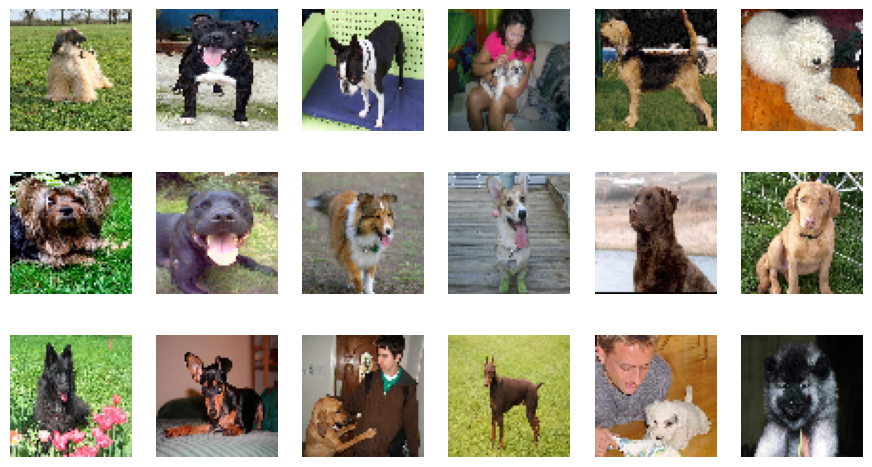

In [10]:
plt.figure(figsize=(11, 6))
for images in train_batches[0]:
  for i in range(18):
    ax = plt.subplot(3, 6, i + 1)
    plt.imshow(images[i])
    plt.axis("off")

\\

## Building Autoencoder



In [12]:
encoder = Sequential([
    Conv2D(48, kernel_size=3, padding='same', activation='relu', input_shape=[64,64,3]),
    MaxPool2D(pool_size=2),
    Conv2D(96, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(192, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(32, kernel_size=3, padding='same', activation='relu')
])

In [13]:
encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 48)        1344      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 48)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 96)        41568     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 96)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 192)       166080    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 192)        0

In [41]:
decoder = Sequential([
    Conv2D(192, kernel_size=1, padding='same', activation='relu', input_shape=[8,8,32]),
    UpSampling2D(size=(2,2)),
    Conv2D(192, kernel_size=3, padding='same', activation='relu'),
    UpSampling2D(size=(2,2)),
    Conv2D(96, kernel_size=3, padding='same', activation='relu'),
    UpSampling2D(size=(2,2)),
    Conv2D(48, kernel_size=3, padding='same', activation='relu'),
    Conv2D(3, kernel_size=3, padding='same', activation='relu')
])

In [42]:
decoder.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 8, 8, 192)         6336      
                                                                 
 up_sampling2d_13 (UpSamplin  (None, 16, 16, 192)      0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 192)       331968    
                                                                 
 up_sampling2d_14 (UpSamplin  (None, 32, 32, 192)      0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 32, 32, 96)        165984    
                                                                 
 up_sampling2d_15 (UpSamplin  (None, 64, 64, 96)     

In [43]:
autoencoder = Sequential([encoder, decoder])

In [44]:
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [46]:
history = autoencoder.fit_generator(train_batches, 
                                    steps_per_epoch=train_batches.samples // 128,
                                    epochs=50)

<ipython-input-46-f60884ee2111>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = autoencoder.fit_generator(train_batches,


Epoch 1/50
160/160 [==============================] - 78s 489ms/step - loss: 0.0243 - accuracy: 0.5729
Epoch 2/50
160/160 [==============================] - 74s 462ms/step - loss: 0.0170 - accuracy: 0.6213
Epoch 3/50
160/160 [==============================] - 87s 543ms/step - loss: 0.0152 - accuracy: 0.7023
Epoch 4/50
160/160 [==============================] - 98s 603ms/step - loss: 0.0150 - accuracy: 0.7266
Epoch 5/50
160/160 [==============================] - 100s 625ms/step - loss: 0.0137 - accuracy: 0.7424
Epoch 6/50
160/160 [==============================] - 74s 461ms/step - loss: 0.0128 - accuracy: 0.7576
Epoch 7/50
160/160 [==============================] - 74s 461ms/step - loss: 0.0128 - accuracy: 0.7553
Epoch 8/50
160/160 [==============================] - 71s 444ms/step - loss: 0.0123 - accuracy: 0.7578
Epoch 9/50
160/160 [==============================] - 73s 455ms/step - loss: 0.0116 - accuracy: 0.7669
Epoch 10/50
160/160 [==============================] - 73s 456ms/step - 

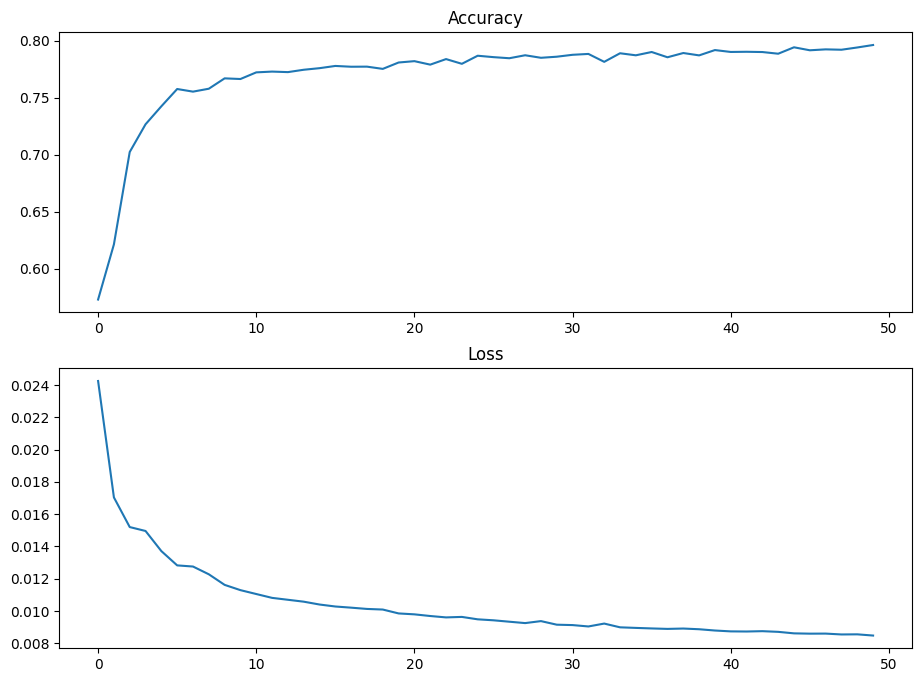

In [47]:
figure, axis = plt.subplots(2, 1)
figure.set_size_inches(11, 8)

axis[0].plot(history.history['accuracy'])
axis[0].set_title("Accuracy")
  
axis[1].plot(history.history['loss'])
axis[1].set_title("Loss")

plt.show()

## Tests

### Visualizing

In [48]:
latent = encoder.predict(train_batches[2][0])
decoded = decoder.predict(latent)

4/4 [==============================] - 1s 12ms/step


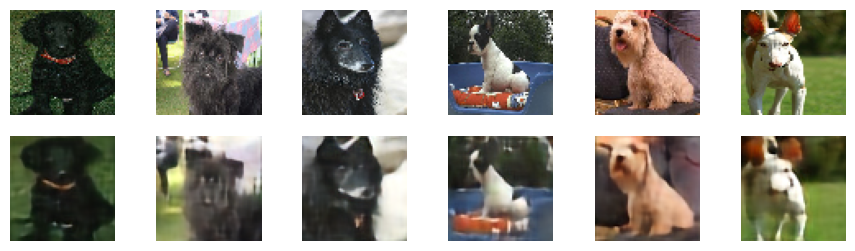

In [80]:
decoded = tf.clip_by_value(decoded, clip_value_min=0, clip_value_max=1.)

plt.figure(figsize=(11, 3))

for i in range(6):
  ax = plt.subplot(2, 6, i + 1)
  plt.imshow(train_batches[2][0][i])
  plt.axis("off")
  ax = plt.subplot(2, 6, 7 + i)
  plt.imshow(decoded[i])
  plt.axis("off")

\\

## Denoise images

In [63]:
import tensorflow as tf

# aplica ruido nas imagens
noise_factor = 0.1
noisy_imgs = train_batches[4][0] + noise_factor * tf.random.normal(shape=train_batches[4][0].shape)
noisy_imgs = tf.clip_by_value(noisy_imgs, clip_value_min=0, clip_value_max=1.)

In [64]:
encoded_noisy = encoder.predict(noisy_imgs)
decoded_noisy = decoder.predict(encoded_noisy)

4/4 [==============================] - 0s 9ms/step


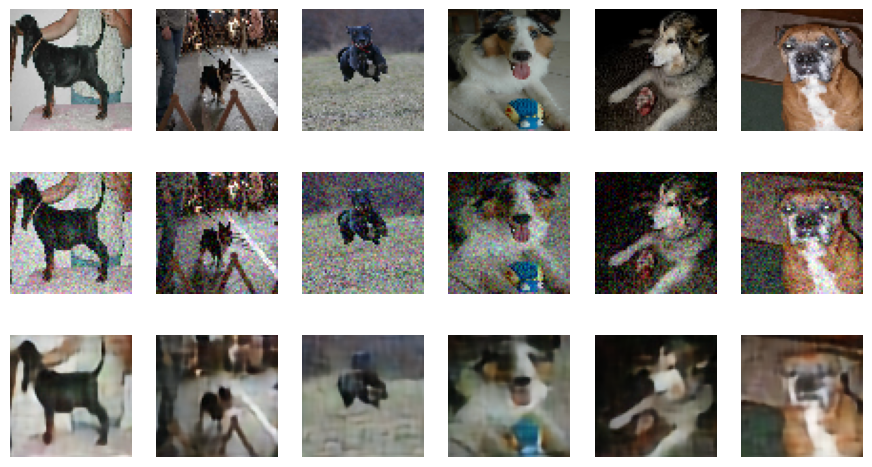

In [65]:
plt.figure(figsize=(11, 6))

for i in range(6):
  ax = plt.subplot(3, 6, i + 1)
  plt.imshow(train_batches[4][0][i])
  plt.axis("off")
  ax = plt.subplot(3, 6, 7 + i)
  plt.imshow(noisy_imgs[i])
  plt.axis("off")
  ax = plt.subplot(3, 6, 13 + i)
  plt.imshow(decoded_noisy[i])
  plt.axis("off")

## Trying to create a Random dog

In [66]:
latent_flatten = latent.reshape(-1, 8*8*32)
mm = np.mean(latent_flatten, axis=0)
ss = np.cov(latent_flatten, rowvar=False)

In [73]:
generated = np.random.multivariate_normal(mm, ss, 12)
generated = generated.reshape((-1,8,8,32))

In [74]:
generated_decoded = decoder.predict(generated)

1/1 [==============================] - 0s 310ms/step


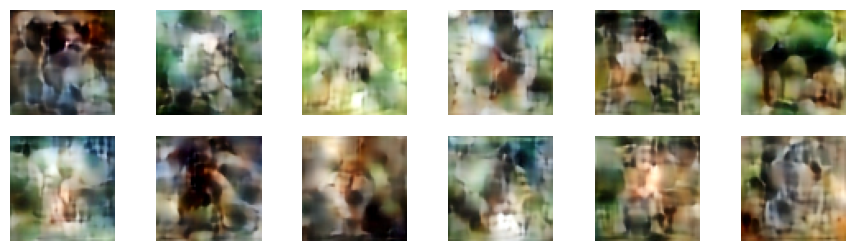

In [78]:
generated_decoded = tf.clip_by_value(generated_decoded, clip_value_min=0, clip_value_max=1.)

plt.figure(figsize=(11, 3))

for i in range(12):
  ax = plt.subplot(2, 6, i + 1)
  plt.imshow(generated_decoded[i])
  plt.axis("off")